<a href="https://colab.research.google.com/github/k8wi/Pneumonia-Detection-using-Convolutional-Neural-Network/blob/main/pneumonia_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all dependencies

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import tensorflow as tf

# Mounting drive containing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading data for Pre-Processing and splitting them into training, validating and testing data

In [4]:
main_path = "/content/drive/MyDrive/pneumonia_dataset"

train_normal = glob(os.path.join(main_path, "train", "NORMAL", "*.jpeg"))
train_pneumonia = glob(os.path.join(main_path, "train", "PNEUMONIA", "*.jpeg"))

test_normal = glob(os.path.join(main_path, "test", "NORMAL", "*.jpeg"))
test_pneumonia = glob(os.path.join(main_path, "test", "PNEUMONIA", "*.jpeg"))

val_normal = glob(os.path.join(main_path, "val", "NORMAL", "*.jpeg"))
val_pneumonia = glob(os.path.join(main_path, "val", "PNEUMONIA", "*.jpeg"))


df_train = pd.DataFrame({
    'class': ['Normal'] * len(train_normal) + ['Pneumonia'] * len(train_pneumonia),
    'image': train_normal + train_pneumonia
})

df_test = pd.DataFrame({
    'class': ['Normal'] * len(test_normal) + ['Pneumonia'] * len(test_pneumonia),
    'image': test_normal + test_pneumonia
})

df_val = pd.DataFrame({
    'class': ['Normal'] * len(val_normal) + ['Pneumonia'] * len(val_pneumonia),
    'image': val_normal + val_pneumonia
})

In [5]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
1,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
2,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
3,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
4,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
...,...,...
5211,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
5212,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
5213,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
5214,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...


In [6]:
df_test

,class,image
0,Normal,/content/drive/MyDrive/pneumonia_dataset/test/...
1,Normal,/content/drive/MyDrive/pneumonia_dataset/test/...
2,Normal,/content/drive/MyDrive/pneumonia_dataset/test/...
3,Normal,/content/drive/MyDrive/pneumonia_dataset/test/...
4,Normal,/content/drive/MyDrive/pneumonia_dataset/test/...
...,...,...
619,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/test/...
620,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/test/...
621,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/test/...
622,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/test/...


In [7]:
import pandas as pd

df_train = pd.concat([df_train, df_val], axis=0)

# Reset the index
df_train = df_train.reset_index(drop=True)


In [8]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
1,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
2,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
3,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
4,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
...,...,...
5227,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/val/P...
5228,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/val/P...
5229,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/val/P...
5230,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/val/P...


# Plotting target distribution in the training and test set

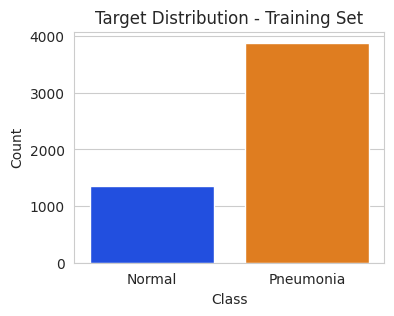

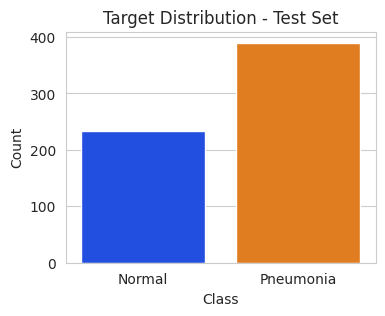

In [9]:
sns.set_palette("bright")
sns.set_style("whitegrid")

# Plotting target distribution in the training set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_train, x='class')
plt.title('Target Distribution - Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plotting target distribution in the test set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_test, x='class')
plt.title('Target Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Plotting sample image and resized image

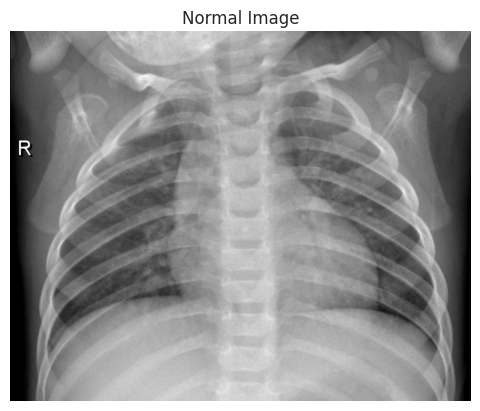

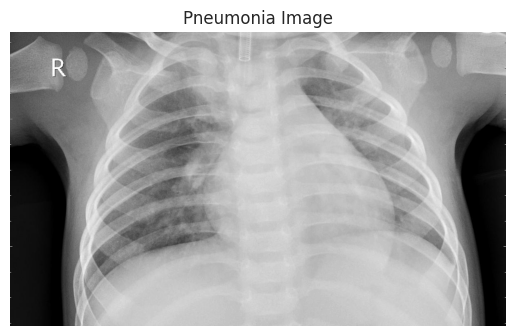

In [10]:
image_path1 = df_train['image'][1]
try:
    image1 = Image.open(image_path1)
    plt.imshow(image1, cmap='gray')
    plt.title('Normal Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

image_path2 = df_train['image'][5110]
try:
    image2 = Image.open(image_path2)
    plt.imshow(image2, cmap='gray')
    plt.title('Pneumonia Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

In [11]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 42, stratify = df_train['class'])

In [12]:
train_df

,class,image
3558,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
2858,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
2673,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
1199,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
4611,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
...,...,...
3468,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
678,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
1552,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
2761,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...


In [13]:
val_df

,class,image
2937,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
4870,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
3169,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
972,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
3051,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
...,...,...
253,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
4307,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...
687,Normal,/content/drive/MyDrive/pneumonia_dataset/train...
3409,Pneumonia,/content/drive/MyDrive/pneumonia_dataset/train...


# Define data generators to rescale image

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values

# Create data generators
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_test = val_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=1
)


Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# Building the Convolutional Neural Network Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))

    return model


In [16]:
model = create_model()

# Visualise Model summary

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

# Creating early stopping so that the training doesnt continue unnecessarily
The training rate reduces as the accuracy plateaus

In [18]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-7,restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor='val_loss',factor = 0.2,patience = 2,min_delt = 1e-7,cooldown = 0,verbose = 1)

#Training the model

In [20]:
# Train the model with early stopping
history = model.fit(ds_train,
                    batch_size = 32,
                    epochs = 12,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/12
130/130 [==============================] - 1129s 9s/step - loss: 0.2911 - binary_accuracy: 0.8793 - val_loss: 0.5768 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/12
130/130 [==============================] - 107s 814ms/step - loss: 0.2403 - binary_accuracy: 0.8989 - val_loss: 0.8753 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/12
131/130 [==============================] - ETA: 0s - loss: 0.2036 - binary_accuracy: 0.9171
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 117s 894ms/step - loss: 0.2036 - binary_accuracy: 0.9171 - val_loss: 0.9610 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/12
130/130 [==============================] - 108s 826ms/step - loss: 0.1913 - binary_accuracy: 0.9262 - val_loss: 0.3918 - val_binary_accuracy: 0.7918 - lr: 6.0000e-06
Epoch 5/12
130/130 [==============================] - 107s 818ms/step - loss: 0.1866 - binary_accuracy: 0.9266 - val_loss: 0.

# Plot the learning curve accuracy

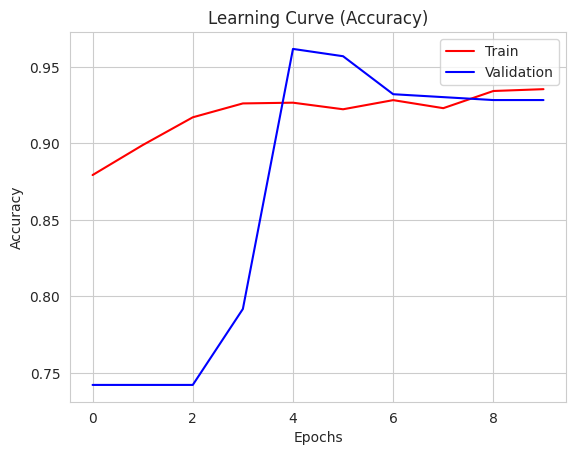

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'], color='red', label='Train')
plt.plot(history.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.show()

# Plot Learnin curve loss

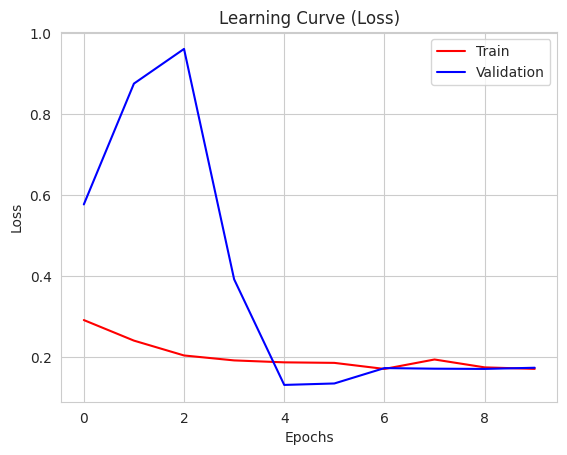

In [22]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels = ds_test.labels
predicted_labels = model.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels = np.round(predicted_labels).flatten()

# Calculate evaluation metrics
cm = confusion_matrix(test_labels, predicted_labels)
classification_rep = classification_report(test_labels, predicted_labels)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_rep)


624/624 [==============================] - 8s 13ms/step
Validation Loss: 0.19544562697410583
Validation Accuracy: 0.90625
Test Loss: 0.5251447558403015
Test Accuracy: 0.7756410241127014
Confusion Matrix:
[[ 29 205]
 [ 67 323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.12      0.18       234
           1       0.61      0.83      0.70       390

    accuracy                           0.56       624
   macro avg       0.46      0.48      0.44       624
weighted avg       0.50      0.56      0.51       624



#Saving the model in a Hierarchical Data Format

In [25]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','pneumonia.h5'))
